# Project 2: Ames Housing Saleprice Prediction
---

Project notebook organisation:<br>
[1 - Data Cleaning](./1_data_cleaning.ipynb) <br>
**[2 - Exploratory Data Analysis and Feature Engineering]** (current notebook)<br>
[3 - Modelling and insights](./3_modelling_and_insights.ipynb)<br>
<br>
<br>

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set_style('ticks')

pd.set_option('display.max_columns', None)

%matplotlib inline

## Introduction

This second notebook in the project will cover EDA and data preprocessing based on the cleaned data from the previous notebook.

## Contents of this workbook
---

1. [Split data into numerical and categorical data](#Split-data-into-numerical-and-categorical-data)
2. [Data visualisation](#Data-visualisation)
  1. [Functions used](#Functions-used)
  1. [Investigating correlations](#Investigating-correlations)
  1. [Visualising numerical data](#Visualising-numerical-data)
  1. [Visualising categorical data](#Visualising-categorical-data)
1. [Summary](#Summary)

In [2]:
#Load relevant datasets

test = pd.read_csv('./datasets/test_cleaned.csv')
train = pd.read_csv('./datasets/train_cleaned.csv')

train.drop(['Unnamed: 0'], axis = 1, inplace = True)
test.drop(['Unnamed: 0'], axis = 1, inplace = True)


In [3]:
train.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109.0,533352170.0,60.0,rl,70.0,13517.0,pave,none,ir1,lvl,allpub,culdsac,gtl,sawyer,rrae,norm,1fam,2story,6.0,8.0,1976.0,2005.0,gable,compshg,hdboard,plywood,brkface,289.0,gd,ta,cblock,ta,ta,no,glq,533.0,unf,0.0,192.0,725.0,gasa,ex,y,sbrkr,725.0,754.0,0.0,1479.0,0.0,0.0,2.0,1.0,3.0,1.0,gd,6.0,typ,0.0,none,attchd,1976.0,rfn,2.0,475.0,ta,ta,y,0.0,44.0,0.0,0.0,0.0,0.0,none,none,none,0.0,3.0,2010.0,wd,130500.0
1,544.0,531379050.0,60.0,rl,43.0,11492.0,pave,none,ir1,lvl,allpub,culdsac,gtl,sawyerw,norm,norm,1fam,2story,7.0,5.0,1996.0,1997.0,gable,compshg,vinylsd,vinylsd,brkface,132.0,gd,ta,pconc,gd,ta,no,glq,637.0,unf,0.0,276.0,913.0,gasa,ex,y,sbrkr,913.0,1209.0,0.0,2122.0,1.0,0.0,2.0,1.0,4.0,1.0,gd,8.0,typ,1.0,ta,attchd,1997.0,rfn,2.0,559.0,ta,ta,y,0.0,74.0,0.0,0.0,0.0,0.0,none,none,none,0.0,4.0,2009.0,wd,220000.0
2,153.0,535304180.0,20.0,rl,68.0,7922.0,pave,none,reg,lvl,allpub,inside,gtl,names,norm,norm,1fam,1story,5.0,7.0,1953.0,2007.0,gable,compshg,vinylsd,vinylsd,none,0.0,ta,gd,cblock,ta,ta,no,glq,731.0,unf,0.0,326.0,1057.0,gasa,ta,y,sbrkr,1057.0,0.0,0.0,1057.0,1.0,0.0,1.0,0.0,3.0,1.0,gd,5.0,typ,0.0,none,detchd,1953.0,unf,1.0,246.0,ta,ta,y,0.0,52.0,0.0,0.0,0.0,0.0,none,none,none,0.0,1.0,2010.0,wd,109000.0
3,318.0,916386060.0,60.0,rl,73.0,9802.0,pave,none,reg,lvl,allpub,inside,gtl,timber,norm,norm,1fam,2story,5.0,5.0,2006.0,2007.0,gable,compshg,vinylsd,vinylsd,none,0.0,ta,ta,pconc,gd,ta,no,unf,0.0,unf,0.0,384.0,384.0,gasa,gd,y,sbrkr,744.0,700.0,0.0,1444.0,0.0,0.0,2.0,1.0,3.0,1.0,ta,7.0,typ,0.0,none,builtin,2007.0,fin,2.0,400.0,ta,ta,y,100.0,0.0,0.0,0.0,0.0,0.0,none,none,none,0.0,4.0,2010.0,wd,174000.0
4,255.0,906425045.0,50.0,rl,82.0,14235.0,pave,none,ir1,lvl,allpub,inside,gtl,sawyerw,norm,norm,1fam,1.5fin,6.0,8.0,1900.0,1993.0,gable,compshg,wd sdng,plywood,none,0.0,ta,ta,pconc,fa,gd,no,unf,0.0,unf,0.0,676.0,676.0,gasa,ta,y,sbrkr,831.0,614.0,0.0,1445.0,0.0,0.0,2.0,0.0,3.0,1.0,ta,6.0,typ,0.0,none,detchd,1957.0,unf,2.0,484.0,ta,ta,n,0.0,59.0,0.0,0.0,0.0,0.0,none,none,none,0.0,3.0,2010.0,wd,138500.0


In [4]:
train.shape

(2048, 81)

## Split data into numerical and categorical data

The dataset appears to have 4 general kinds of data:
* IDs
* Numerical
* Ordinal
* Categorical

Due to the large number of features, I will split the dataset into these three categories in order for more effective data preprocesing. 

In [5]:
# Assign 'id' and 'pid' fields to a variable called 'train_ids'
train_ids = train[['id', 'pid']]
# Assign numerical fields to a variable called 'train_numerical'
train_numerical = train.select_dtypes(exclude=['object'])
# Assign categorical fields to a variable called 'train_numerical' and concatenate the 'train_ids'
# for future merging
train_categorical = train.select_dtypes(exclude=['float'])
train_categorical = pd.concat([train_categorical, train_ids], axis=1, sort=False)



In [6]:
train_categorical

,ms_zoning,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_type_2,heating,heating_qc,central_air,electrical,kitchen_qual,functional,fireplace_qu,garage_type,garage_finish,garage_qual,garage_cond,paved_drive,pool_qc,fence,misc_feature,sale_type,id,pid
0,rl,pave,none,ir1,lvl,allpub,culdsac,gtl,sawyer,rrae,norm,1fam,2story,gable,compshg,hdboard,plywood,brkface,gd,ta,cblock,ta,ta,no,glq,unf,gasa,ex,y,sbrkr,gd,typ,none,attchd,rfn,ta,ta,y,none,none,none,wd,109.0,533352170.0
1,rl,pave,none,ir1,lvl,allpub,culdsac,gtl,sawyerw,norm,norm,1fam,2story,gable,compshg,vinylsd,vinylsd,brkface,gd,ta,pconc,gd,ta,no,glq,unf,gasa,ex,y,sbrkr,gd,typ,ta,attchd,rfn,ta,ta,y,none,none,none,wd,544.0,531379050.0
2,rl,pave,none,reg,lvl,allpub,inside,gtl,names,norm,norm,1fam,1story,gable,compshg,vinylsd,vinylsd,none,ta,gd,cblock,ta,ta,no,glq,unf,gasa,ta,y,sbrkr,gd,typ,none,detchd,unf,ta,ta,y,none,none,none,wd,153.0,535304180.0
3,rl,pave,none,reg,lvl,allpub,inside,gtl,timber,norm,norm,1fam,2story,gable,compshg,vinylsd,vinylsd,none,ta,ta,pconc,gd,ta,no,unf,unf,gasa,gd,y,sbrkr,ta,typ,none,builtin,fin,ta,ta,y,none,none,none,wd,318.0,916386060.0
4,rl,pave,none,ir1,lvl,allpub,inside,gtl,sawyerw,norm,norm,1fam,1.5fin,gable,compshg,wd sdng,plywood,none,ta,ta,pconc,fa,gd,no,unf,unf,gasa,ta,y,sbrkr,ta,typ,none,detchd,unf,ta,ta,n,none,none,none,wd,255.0,906425045.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2043,rl,pave,none,ir1,hls,allpub,inside,gtl,timber,norm,norm,1fam,1story,gable,compshg,vinylsd,vinylsd,none,gd,ta,pconc,gd,ta,av,glq,unf,gasa,ex,y,sbrkr,gd,typ,gd,attchd,fin,ta,ta,y,none,none,none,wd,1587.0,921126030.0
2044,rl,pave,none,ir1,lvl,allpub,inside,gtl,edwards,norm,norm,1fam,1story,gable,compshg,vinylsd,vinylsd,none,ta,ta,cblock,ta,ta,no,blq,unf,gasa,ex,y,sbrkr,ta,typ,none,detchd,unf,ta,ta,y,none,none,none,wd,785.0,905377130.0
2045,rl,pave,none,reg,bnk,allpub,inside,gtl,crawfor,norm,norm,1fam,1.5fin,gable,compshg,brkface,stone,none,ta,ta,brktil,ta,ta,no,unf,unf,gasa,gd,y,sbrkr,ta,typ,ta,detchd,unf,fa,fa,y,none,none,none,wd,916.0,909253010.0
2046,rl,pave,none,reg,lvl,allpub,corner,gtl,names,norm,norm,1fam,1story,gable,compshg,plywood,plywood,none,ta,ta,cblock,ta,ta,no,rec,lwq,gasa,ta,y,sbrkr,ta,typ,gd,attchd,unf,ta,ta,y,none,none,none,wd,639.0,535179160.0


## Data Visualisation

### Functions used



In [7]:
#For numerical Data

# This function plots numerical data using .distplot and .boxplot in order to understand the distribution of the different
# features.
def dist_plots(df, list_of_columns):
    nrows = len(list_of_columns)
    fig, ax = plt.subplots(nrows = nrows, ncols = 2, figsize=(15, nrows*3.5))
    ax = ax.ravel()
    for i, col in enumerate(list_of_columns):
        sns.distplot(df[col], ax = ax[i*2-2], fit = stats.norm)
        ax[i*2-2].set_title(f'{col} distribution plot',fontsize=14)
        ax[i*2-2].tick_params(labelsize=12)
        ax[i*2-2].set_xlabel(col, fontsize=14)
        
        sns.boxplot(df[col], width = 0.2, ax = ax[i*2-1])
        ax[i*2-1].set_title(f'{col} box plot',fontsize=14)
        ax[i*2-1].tick_params(labelsize=12)
        ax[i*2-1].set_xlabel(col, fontsize=14)
        
    plt.tight_layout()
    
# This function plots scatterplots for numerical data
def scatterplots(dataframe, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns)/3)) 
    fig, ax = plt.subplots(nrows=nrows, ncols=3,figsize=(15, nrows*3.5)) 
    ax = ax.ravel() 
    for i, column in enumerate(list_of_columns): 
        sns.regplot(y=dataframe.saleprice, x=dataframe[column],ax=ax[i], \
                    scatter_kws={'facecolors':'skyblue','edgecolor':'skyblue'},
                    line_kws = {'color':'grey'})
        ax[i].set_title(f'{column} vs saleprice',fontsize=14)  
        ax[i].tick_params(labelsize=12)
        ax[i].set_xlabel(column, fontsize=14)
        ax[i].set_ylabel('saleprice', fontsize=14)
    plt.tight_layout()
    

    
# For categorical data
    
# This function allows the plotting of boxplot subplots for categorical data and to understand their 
# relation to saleprice
def boxplots(dataframe, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns)/3)) 
    fig, ax = plt.subplots(nrows=nrows, ncols=3,figsize=(15, nrows*3.5)) 
    ax = ax.ravel() 
    for i, column in enumerate(list_of_columns): 
        sns.boxplot(x = dataframe[column], y = dataframe.saleprice, width = 0.3, ax = ax[i], color='skyblue')
        ax[i].set_title(column,fontsize=14)  
        ax[i].tick_params(labelsize=12)
        ax[i].set_xlabel(column, fontsize=14)
        ax[i].set_ylabel('saleprice', fontsize=14)
    plt.tight_layout()
    
    
# This function plots histogram subplots for categorical data
def histograms(dataframe, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns)/3)) 
    fig, ax = plt.subplots(nrows=nrows, ncols=3,figsize=(15, nrows*3.0)) 
    ax = ax.ravel() 
    for i, column in enumerate(list_of_columns): 
        ax[i].hist(dataframe[column],bins=15)
        ax[i].set_title(f'{column} distribution',fontsize=14)
        ax[i].tick_params(labelsize=12)
        ax[i].set_xlabel(column, fontsize=14)
    plt.tight_layout()
    
    


## Investigating correlations

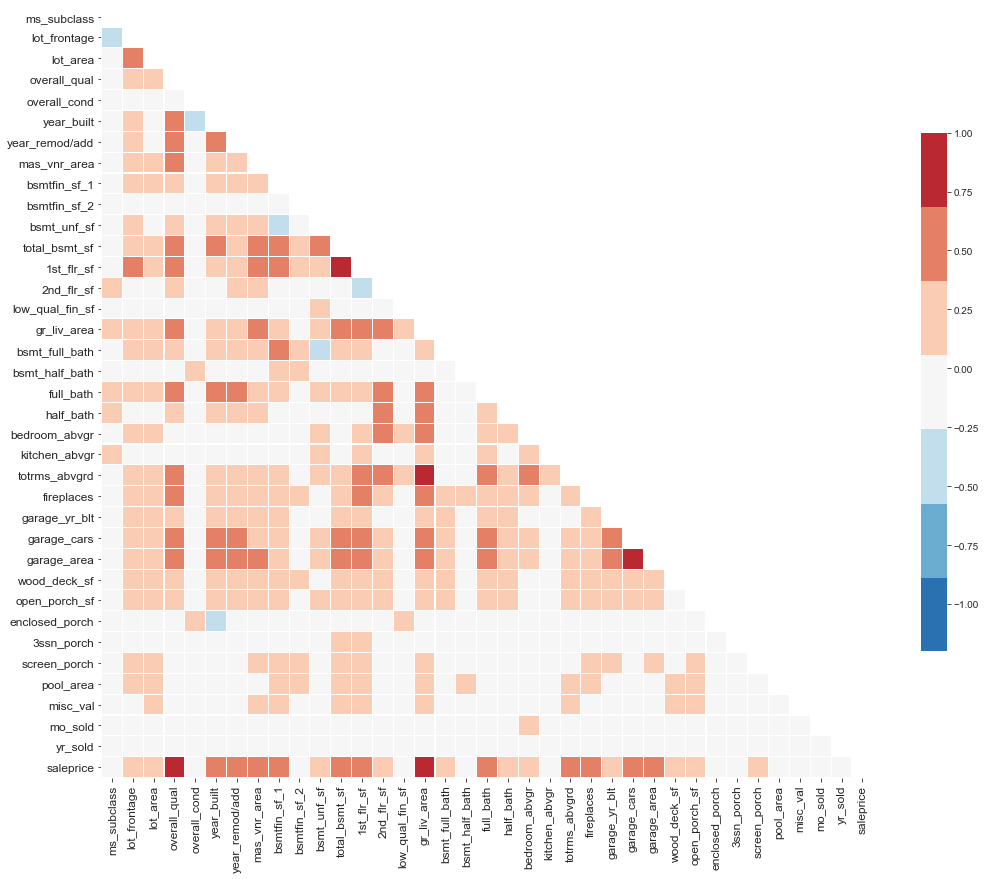

In [8]:
# plot heatmap
mask = np.zeros_like(train.drop(['id', 'pid'], axis =1).corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(train.drop(['id', 'pid'], axis =1).corr(),
            mask = mask,
            square=True,
            vmin = -1.2,
            vmax = 1,
            linewidth=0.1,
            cbar_kws = {'shrink':0.5},
            cmap=sns.color_palette("RdBu_r", 7))
ax.tick_params(labelsize=12)
plt.tight_layout()

From the heatmap it looks like some of the variables are highly correlated with each other. 
- `garage_cars` and `garage_area` (garage area increases with increasing number of cars that can fit in it)
- `total_rms_abvgrd` and `gr_livarea` (area increases with increasing number of rooms)
- `1st_flr_sf` and `total_bsmt_sf` (the first floor is on top of the basement, so they likely have similar size).

I will consider dropping one out of these 2 features during the processing step at the end of this section on 'investigating correlations'.

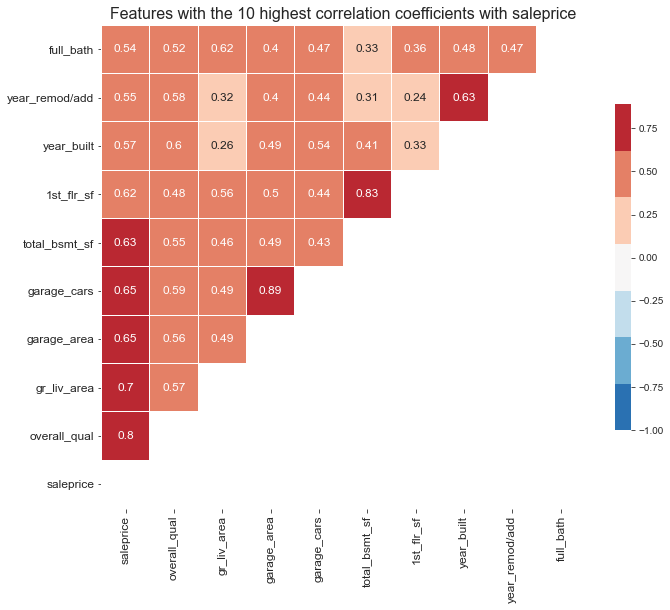

In [9]:
# Get columns with 10 highest corrcoef with 'saleprice' as an index
corr_cols = train.drop(['id', 'pid'], axis =1).corr().nlargest(10, 'saleprice').index

# create heatmap
mask = np.zeros_like(train[corr_cols].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(train[corr_cols].corr(), 
            annot=True, 
            square= True, 
            mask = mask,
            cmap=sns.color_palette("RdBu_r", 7),
            annot_kws={'size': 12},
            cbar_kws={"shrink": 0.5},
            linewidth = 0.1,
            yticklabels=corr_cols.values, 
            xticklabels=corr_cols.values,
            vmin = -1)
ax.set_xlim(0,10)
ax.set_ylim(0,10)
ax.tick_params(labelsize=12)
plt.title('Features with the 10 highest correlation coefficients with saleprice', fontsize=16)
plt.tight_layout()

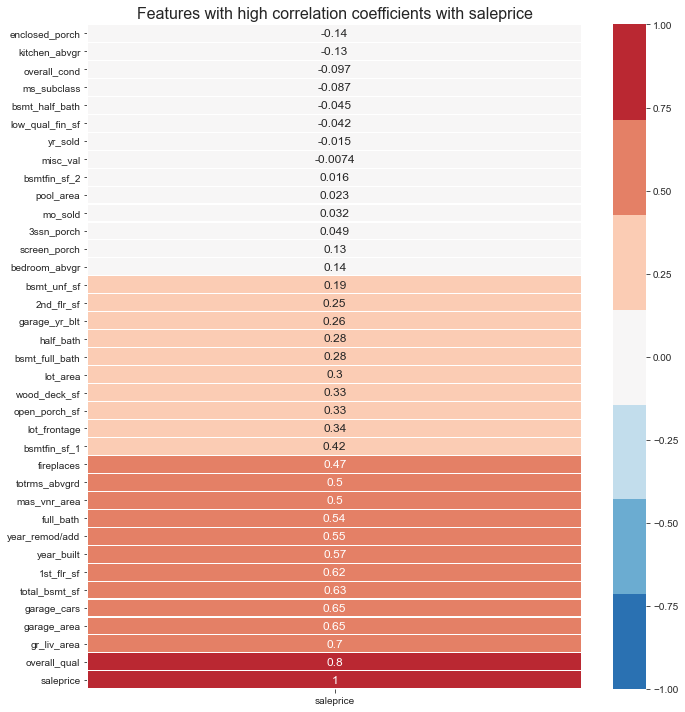

In [10]:
# Filtered correlation of features with SalePrice

f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(train.drop(['id', 'pid'], axis =1).corr()[['saleprice']].sort_values(['saleprice']), 
            cmap=sns.color_palette("RdBu_r", 7), 
            annot_kws={'size': 12},
            linewidth = 0.1,
            vmin = -1,
            annot = True)

plt.title('Features with high correlation coefficients with saleprice', fontsize=16)
plt.tight_layout()

From the heatmaps generated, it appears there are no factors that are highly negatively correlated with `saleprice`.
The main features with strong correlations (>0.15) to `saleprice` are:

`overall_qual`
`gr_liv_area`
`garage_area`
`garage_cars`
`total_bsmt_sf`
`1st_flr_sf`
`year_built`
`year_remod/add`
`full_bath`
`mass_vnr_area`
`totrms_abvground`
`fireplaces`
`bsmtfin_sf_1`
`lot_frontage`
`open_porch_sf`
`wood_deck_sf`
`lot_area`
`bsmt_full_bath`
`half_bath`
`garage_yr_built`
`2nd_flr_sf`
`bsmt_unf_sf`

Other features should be dropped.

In addition, `garage_cars` shows strong collinearity with `garage_area` and should also be dropped.

Athough `1st_flr_sf` and `total_bsmt_sf` likely show collinearity, it is probable that having a basement would likely be a strong factor in pushing up the `Sale_Price`. For this reason, I will retain both features.

In [11]:
train.drop(['enclosed_porch', 'kitchen_abvgr', 'overall_cond', 'ms_subclass', 'bsmt_half_bath', 'low_qual_fin_sf', 
            'yr_sold', 'misc_val', 'bsmtfin_sf_2', 'pool_area', 'mo_sold', '3ssn_porch', 'screen_porch', 'bedroom_abvgr']
          , axis = 1, inplace = True)

In [12]:
test.drop(['enclosed_porch', 'kitchen_abvgr', 'overall_cond', 'ms_subclass', 'bsmt_half_bath', 'low_qual_fin_sf', 
            'yr_sold', 'misc_val', 'bsmtfin_sf_2', 'pool_area', 'mo_sold', '3ssn_porch', 'screen_porch', 'bedroom_abvgr']
          , axis = 1, inplace = True)

In [13]:
train.drop(['garage_cars']
          , axis = 1, inplace = True)

In [14]:
test.drop(['garage_cars']
          , axis = 1, inplace = True)

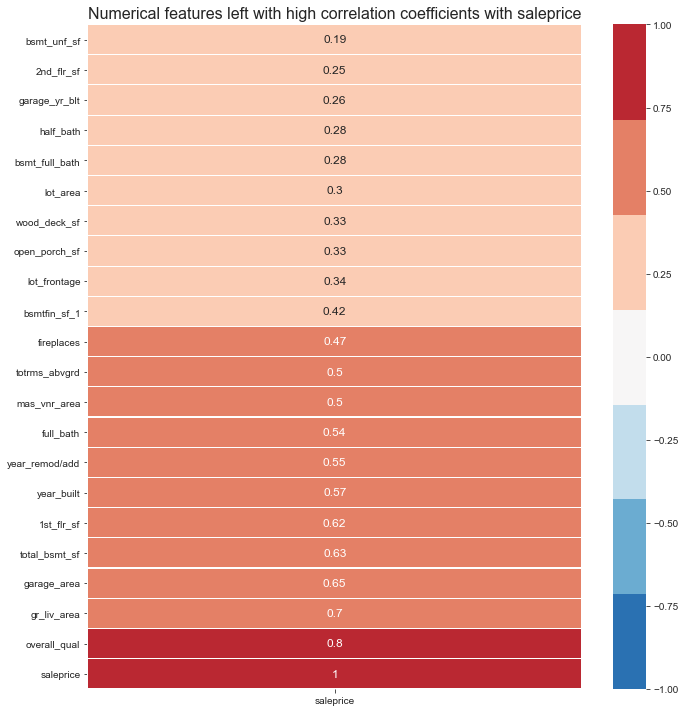

In [15]:

# Filtered correlation of features with SalePrice

f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(train.drop(['id', 'pid'], axis =1).corr()[['saleprice']].sort_values(['saleprice']), 
            cmap=sns.color_palette("RdBu_r", 7), 
            annot_kws={'size': 12},
            linewidth = 0.1,
            vmin = -1,
            annot = True)

plt.title('Numerical features left with high correlation coefficients with saleprice', fontsize=16)
plt.tight_layout()

The numerical features in the above figure are the ones that I will retain in the final model due to their correlations with saleprice. 

The features appear to have 'themes' of house quality, area, decoration and newness. This is liely indicative that of all the continous features, quality, area, age and fanciful features such as fireplaces are the biggest factors behind higher saleprices. 

Homeowners looking to increase the value ofn their house could consider building a garage, adding a fireplace, constructing an annex and selling their houses while they are relatively new in order to ask for the highest prices.

### Visualising numerical data

In [16]:
# Drop previously dropped columns from train_numerical as well.

train_numerical.drop(['garage_cars', 'enclosed_porch', 'kitchen_abvgr', 'overall_cond', 'ms_subclass', 'bsmt_half_bath', 'low_qual_fin_sf', 
            'yr_sold', 'misc_val', 'bsmtfin_sf_2', 'pool_area', 'mo_sold', '3ssn_porch', 'screen_porch', 'bedroom_abvgr']
          , axis = 1, inplace = True)

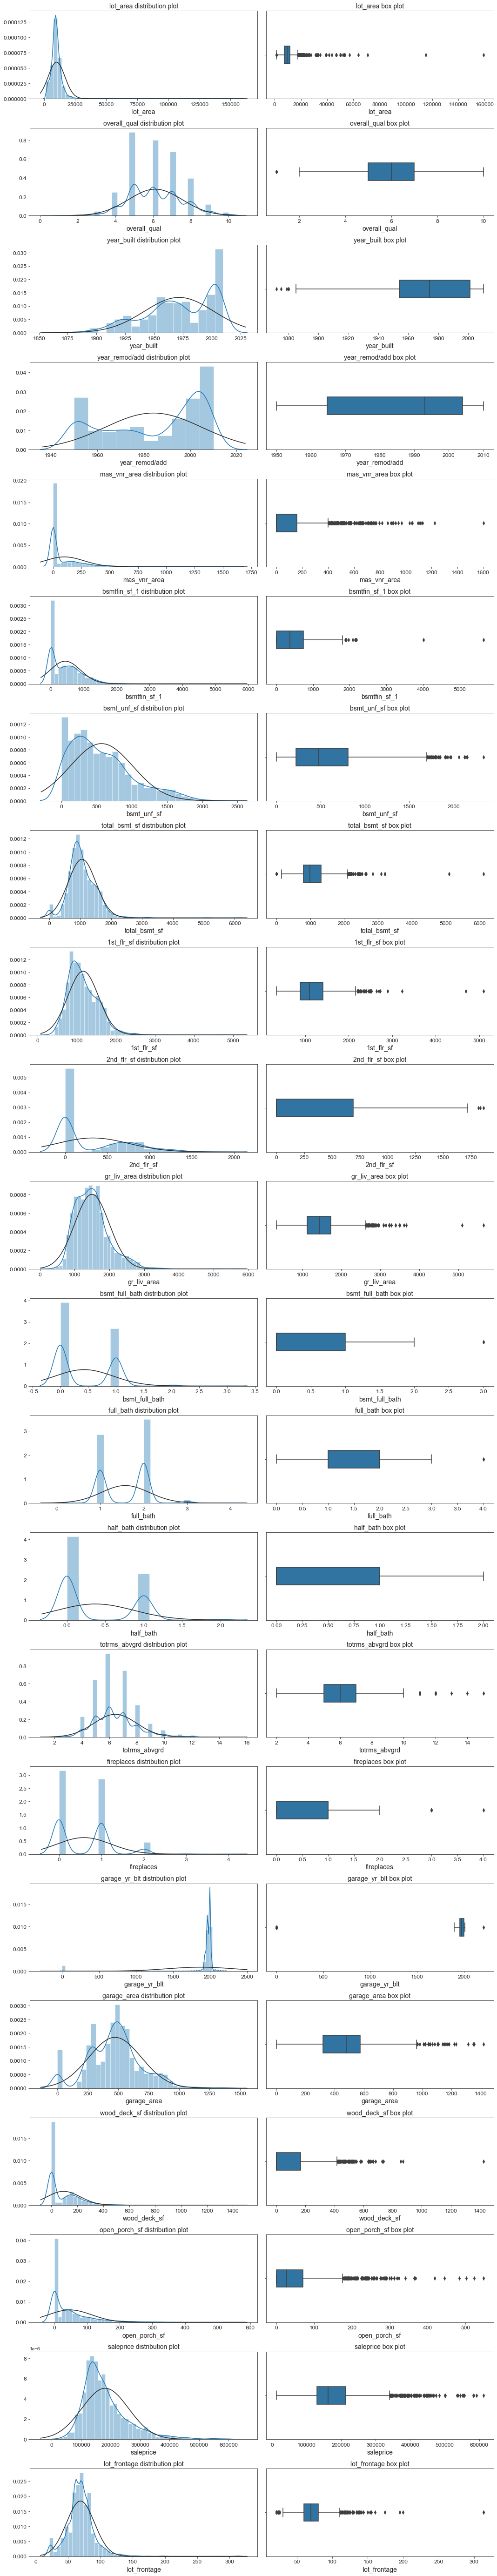

In [17]:
#Plot numerical data in distribution plots in order to examine distributions
dist_plots(train,train_numerical.drop(['id', 'pid'], axis =1).columns)

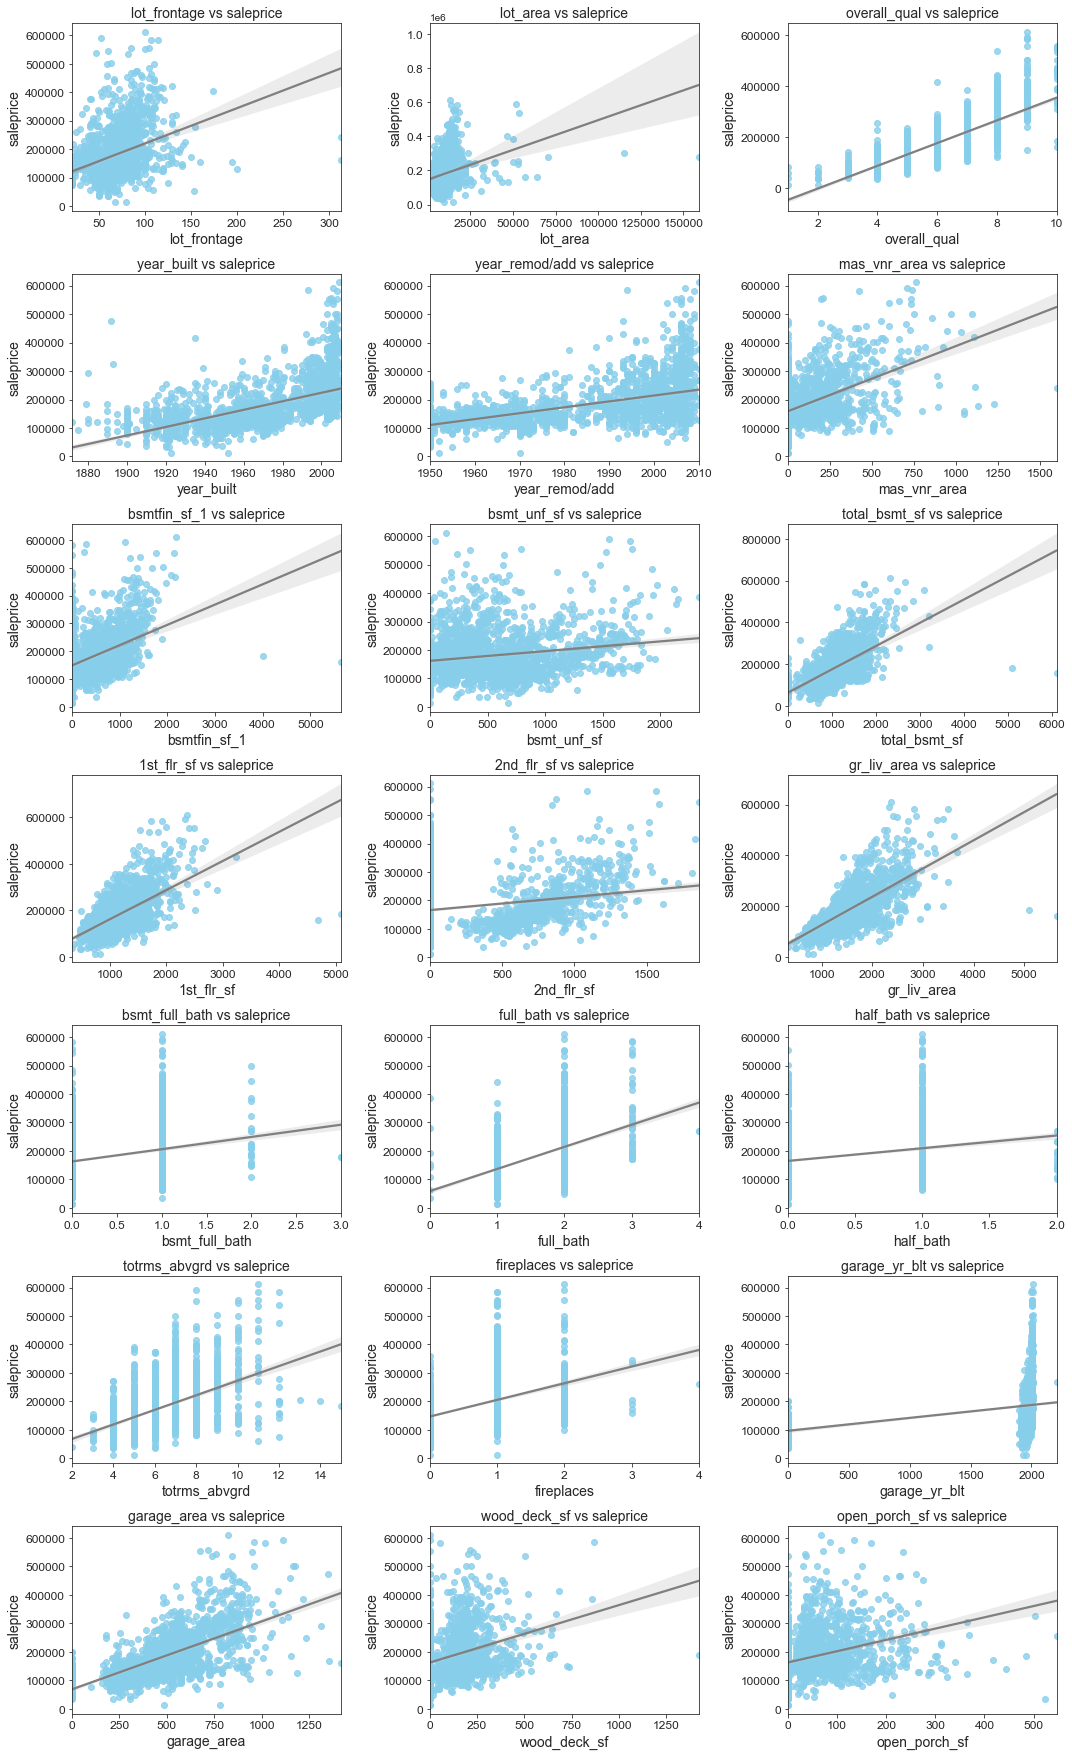

In [18]:
scatterplots(train,train_numerical.drop(['id', 'pid', 'saleprice'], axis =1).columns)

Most of the numerical features are not normally distributed as the distribution plots are not bell-shaped (as opposed to how they would look like if they were normal - as shown by the black curve in each plot).

The respective boxplots confirm this with many features possesing strong skews.

Some features also have a large number of zeros, e.g. `bsmtfin_sf_1`, which may throw off the final model. 

From the boxplots, a number of features stand out that seem to be directly correlated with `saleprice`.

Features with the strongest correlation include:

`overall_qual`
`gr_liv_area`
`garage_area`
`garage_cars`
`total_bsmt_sf`
`1st_flr_sf`
`year_built`
`year_remod/add`
`full_bath`
`mass_vnr_area`
`totrms_abvground`
`fireplaces`
`bsmtfin_sf_1`
`lot_frontage`
`open_porch_sf`
`wood_deck_sf`
`lot_area`
`bsmt_full_bath`
`half_bath`
`garage_yr_built`
`2nd_flr_sf`
`bsmt_unf_sf`

Other numerical features have been dropped


From the scatterplots above, a relatively linear relationship exists between `saleprice` and the remaining features, for example, `overallqual`, `yearbuilt`, `totalbsmtsf`, `1stflrsf`, `grlivarea`, `totrmsabvgrd`, `fireplaces`, `garagecars`, and `garagearea`. Many of these represent areas, therefore area is likely to be an important predictor of `saleprice`.

There are also a few obvious outliers, in 
- `lotarea`
- `lotfrontage`
- `1stflrsf`
- `bsmtfinsf1`
- `grlivarea`

These are houses with very large areas/very long lot frontage but very low prices. These are likely the same 2 points.

### Visualising categorical data

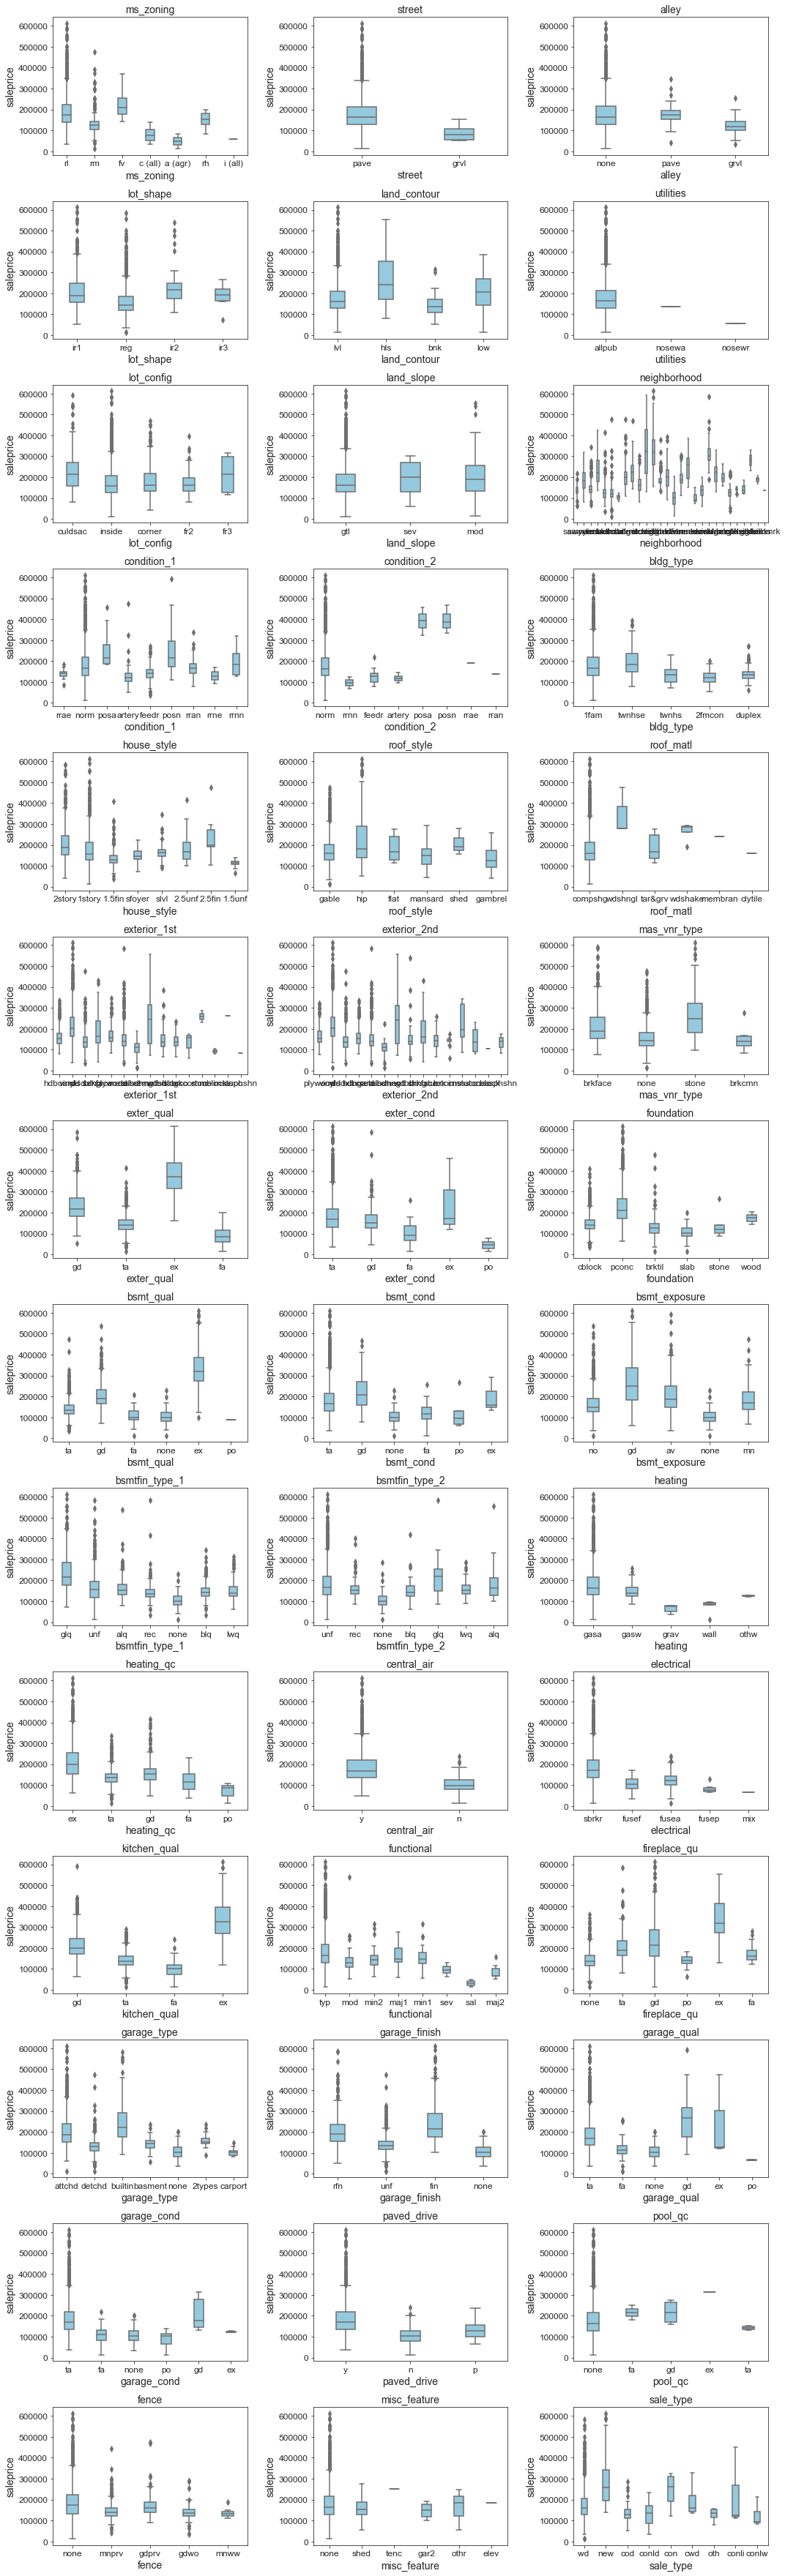

In [19]:
boxplots(train,train_categorical.drop(['id', 'pid'], axis =1).columns)

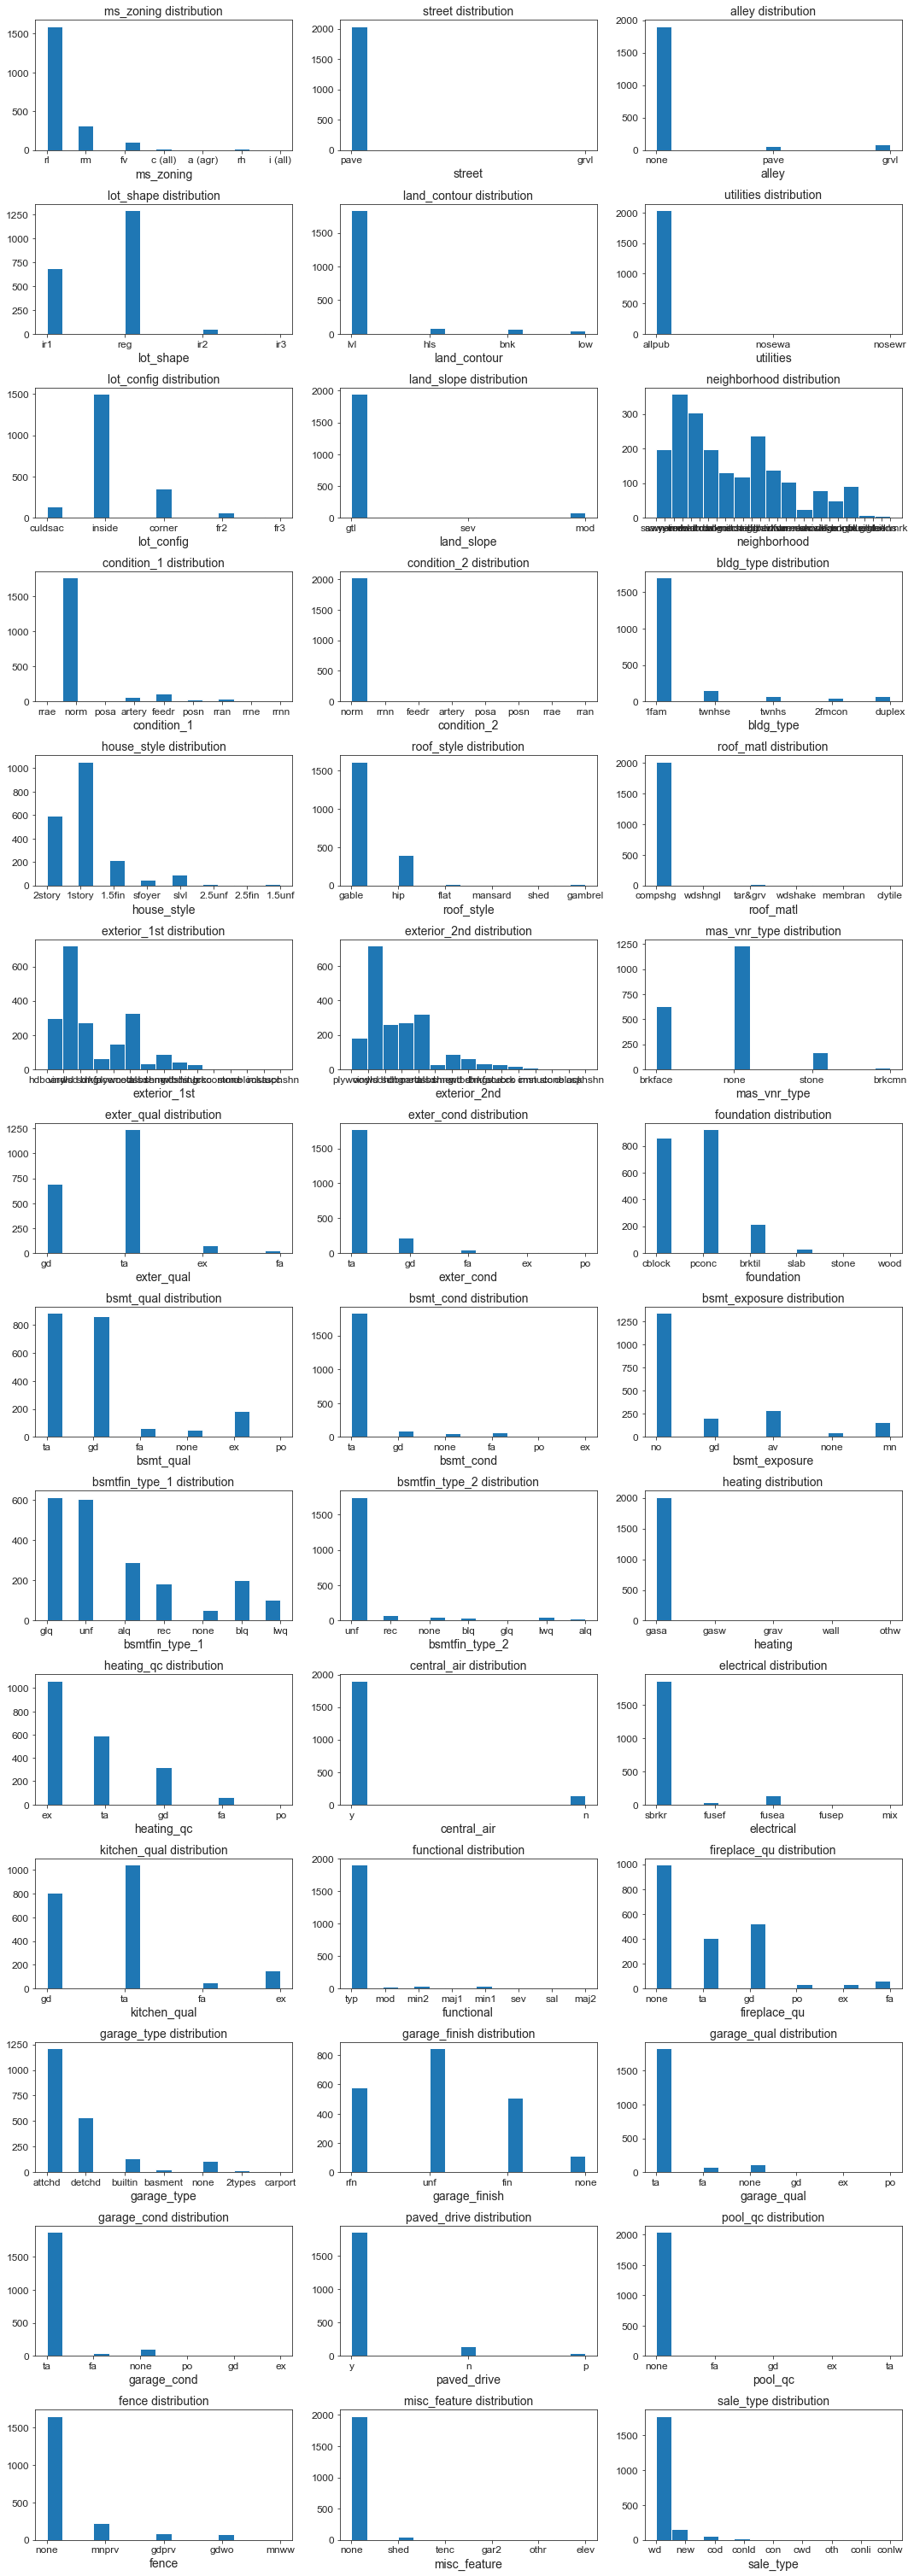

In [20]:
histograms(train,train_categorical.drop(['id', 'pid'], axis =1).columns)

The majority of features immediately stand out as being ordinal and can be converted to numerical using one hot encoding to better visualise their impact on regressions. 

Some columns are highly skewed towards a single value or had numerous zeros. Among these columns, the following are not likely to be important in terms of saleprice, and will be dropped:
- `alley` (93.2% null)
- `street` (99.7% single value)
- `utilities` (99.9% single value)
- `condition_2` (98.7% single value)
- `roof_matl` (98.7% single value)
- `heating` (98.4% single value)
- `central_air` (93.1% single value)
- `electrical` (91.1% single value)
- `paved_drive` (90.7 single value)
- `fence` (80.5% zeros)
- `sale_type` (86.8% single value)
- `bsmt_fintype2` (85.3% zeros)
- `bsmt_finsf2` (88% zeros)
- `bsmt_cond` (89.% single value)
- `exter_cond` (86.7% single value)
- `garage_qual` (89.6% single value)


In [21]:
train.drop(['alley', 'street', 'utilities', 'condition_2', 'roof_matl', 'heating', 'central_air'
           , 'electrical', 'paved_drive', 'fence', 'sale_type', 'bsmt_cond', 'exter_cond', 
            'garage_qual'], axis =1, inplace =True)

In [22]:
test.drop(['alley', 'street', 'utilities', 'condition_2', 'roof_matl', 'heating', 'central_air'
           , 'electrical', 'paved_drive', 'fence', 'sale_type', 'bsmt_cond', 'exter_cond', 
            'garage_qual'], axis =1, inplace =True)

In [23]:
test.drop(['misc_feature'], axis =1, inplace =True)

In [24]:
train.drop(['misc_feature'], axis =1, inplace =True)

## Features that require closer examination

### Neighborhood

Based on the distribution graphs above, several of the features needed a closer look in order to determine the appropriate feature engineering procedure.

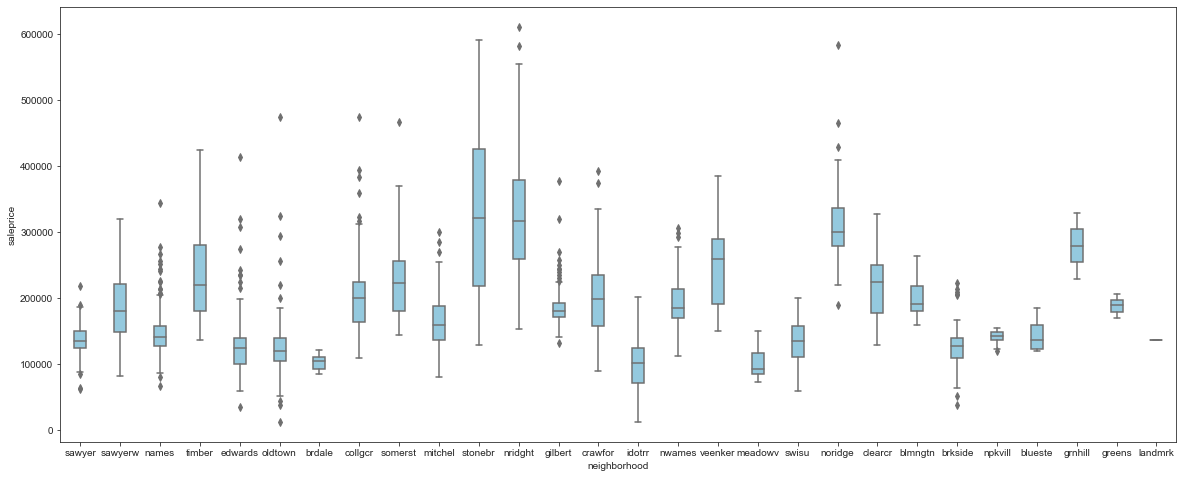

In [25]:
plt.figure(figsize = (20,8))
sns.boxplot(x = train['neighborhood'], y = train.saleprice, width = 0.3, color='skyblue')

Based on a boxplot chart of the neighborhood vs saleprice, it appears the most expensive houses are in Northridge Heights and Stone Brook. These neighborhoods also have the highest spread of prices. THis is perhaps unsurprising as they are in the 'residential' zones. 

Unsurprisingly, the lowest prices appear to be in Old Town and near the Iowa DOT and Rail. 

This data will be fed into the model using dummification after this pre-processing stage.

### Exterior materials

Seems like most of the houses have a single exterior material, and for the few with two materials, the materials are mostly of similar type (e.g. wood single and wood siding), or misspelt (e.g. cemntbd and cment bd). 

I will hence drop `exterior_2nd`.

In [26]:
train['exterior_2nd'].value_counts()

vinylsd    721
metalsd    324
hdboard    275
wd sdng    262
plywood    183
cmentbd     90
wd shng     63
brkface     34
stucco      30
asbshng     28
brk cmn     17
imstucc     11
stone        6
asphshn      3
cblock       1
Name: exterior_2nd, dtype: int64

In [27]:
train['exterior_1st'].value_counts()

vinylsd    724
metalsd    330
hdboard    300
wd sdng    275
plywood    151
cemntbd     90
brkface     64
wdshing     45
asbshng     33
stucco      27
brkcomm      3
stone        2
cblock       2
imstucc      1
asphshn      1
Name: exterior_1st, dtype: int64

In addition, I will make a new column called `exterior` with a new data classification of the materials

In [28]:
# EXTERIOR MATERIALS
exterior_materials = {'metalsd': 'metal',
                      'hdboard': 'wood',
                      'wd sdng': 'wood',
                      'plywood': 'wood',
                      'wdshing': 'wood',
                      'cemntbd': 'aggregate',
                      'stucco': 'aggregate',
                      'cblock': 'aggregate',
                      'asphshn': 'aggregate',
                      'imstucc': 'aggregate',
                      'precast' : 'aggregate',
                      'brkface': 'brick',
                      'brkcomm': 'brick',
                      'asbshng': 'aesbestos',
                      'stone': 'stone',                     
                      'vinylsd': 'vinyl'}
train['exterior'] = train['exterior_1st'].map(exterior_materials)
test['exterior'] = test['exterior_1st'].map(exterior_materials)

#Drop `exterior_1st` and 'exterior_2nd'
test.drop(['exterior_1st', 'exterior_2nd'], axis =1, inplace =True)
train.drop(['exterior_1st', 'exterior_2nd'], axis =1, inplace =True)

In [29]:
test[test['exterior'].isna()]

,id,pid,ms_zoning,lot_frontage,lot_area,lot_shape,land_contour,lot_config,land_slope,neighborhood,condition_1,bldg_type,house_style,overall_qual,year_built,year_remod/add,roof_style,mas_vnr_type,mas_vnr_area,exter_qual,foundation,bsmt_qual,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmt_unf_sf,total_bsmt_sf,heating_qc,1st_flr_sf,2nd_flr_sf,gr_liv_area,bsmt_full_bath,full_bath,half_bath,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_area,garage_cond,wood_deck_sf,open_porch_sf,pool_qc,exterior


### Porches

After dropping the previous 'porch' related features, the final porch feature `open_porch_sf` appears to be the only feature of note that may have some correlation with `Saleprice`. 
However, a large number of 0s present can also through off a linear regression model. 
I have hence decided to convert this into an ordinal variable indicating either the presence '1' or absence '0' of a porch.

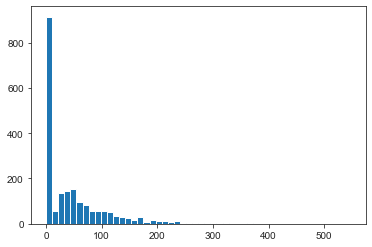

In [30]:
# check distribution of porch columns
#col_porch = ['enclosed_porch','open_porch_sf']
plt.hist(train['open_porch_sf'], bins = 50);

In [31]:
train['porch'] = train['open_porch_sf'].apply(lambda x: 1 if x > 0 else 0)

In [32]:
train.drop(['open_porch_sf'], axis = 1, inplace =True)

In [33]:
test['porch'] = test['open_porch_sf'].apply(lambda x: 1 if x > 0 else 0)

In [34]:
test.drop(['open_porch_sf'], axis = 1, inplace =True)

In [35]:
train.head()

,id,pid,ms_zoning,lot_frontage,lot_area,lot_shape,land_contour,lot_config,land_slope,neighborhood,condition_1,bldg_type,house_style,overall_qual,year_built,year_remod/add,roof_style,mas_vnr_type,mas_vnr_area,exter_qual,foundation,bsmt_qual,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmt_unf_sf,total_bsmt_sf,heating_qc,1st_flr_sf,2nd_flr_sf,gr_liv_area,bsmt_full_bath,full_bath,half_bath,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_area,garage_cond,wood_deck_sf,pool_qc,saleprice,exterior,porch
0,109.0,533352170.0,rl,70.0,13517.0,ir1,lvl,culdsac,gtl,sawyer,rrae,1fam,2story,6.0,1976.0,2005.0,gable,brkface,289.0,gd,cblock,ta,no,glq,533.0,unf,192.0,725.0,ex,725.0,754.0,1479.0,0.0,2.0,1.0,gd,6.0,typ,0.0,none,attchd,1976.0,rfn,475.0,ta,0.0,none,130500.0,wood,1
1,544.0,531379050.0,rl,43.0,11492.0,ir1,lvl,culdsac,gtl,sawyerw,norm,1fam,2story,7.0,1996.0,1997.0,gable,brkface,132.0,gd,pconc,gd,no,glq,637.0,unf,276.0,913.0,ex,913.0,1209.0,2122.0,1.0,2.0,1.0,gd,8.0,typ,1.0,ta,attchd,1997.0,rfn,559.0,ta,0.0,none,220000.0,vinyl,1
2,153.0,535304180.0,rl,68.0,7922.0,reg,lvl,inside,gtl,names,norm,1fam,1story,5.0,1953.0,2007.0,gable,none,0.0,ta,cblock,ta,no,glq,731.0,unf,326.0,1057.0,ta,1057.0,0.0,1057.0,1.0,1.0,0.0,gd,5.0,typ,0.0,none,detchd,1953.0,unf,246.0,ta,0.0,none,109000.0,vinyl,1
3,318.0,916386060.0,rl,73.0,9802.0,reg,lvl,inside,gtl,timber,norm,1fam,2story,5.0,2006.0,2007.0,gable,none,0.0,ta,pconc,gd,no,unf,0.0,unf,384.0,384.0,gd,744.0,700.0,1444.0,0.0,2.0,1.0,ta,7.0,typ,0.0,none,builtin,2007.0,fin,400.0,ta,100.0,none,174000.0,vinyl,0
4,255.0,906425045.0,rl,82.0,14235.0,ir1,lvl,inside,gtl,sawyerw,norm,1fam,1.5fin,6.0,1900.0,1993.0,gable,none,0.0,ta,pconc,fa,no,unf,0.0,unf,676.0,676.0,ta,831.0,614.0,1445.0,0.0,2.0,0.0,ta,6.0,typ,0.0,none,detchd,1957.0,unf,484.0,ta,0.0,none,138500.0,wood,1


### Garages

Of the 2048 entries, most (1562) garages were built in the year the house was built. 113 have 0 as an entry, meaning there is no garage. Only 373 entries have a garage built in a different year. Mist of the garages were hence built in the same year as the house and it is likely that the presence of the garage as opposed to the newness of the garage has a larger effect on `saleprice`. `garage_yr_blt` will hence be dropped.

In [36]:
len(train.year_built)

2048

In [37]:

len(train[train['garage_yr_blt']==train['year_built']])

1562

In [38]:
len(train[train['garage_yr_blt']==0])

113

In [39]:
train.drop(['garage_yr_blt'], axis = 1, inplace =True)
test.drop(['garage_yr_blt'], axis = 1, inplace =True)

In [40]:
train.head()

,id,pid,ms_zoning,lot_frontage,lot_area,lot_shape,land_contour,lot_config,land_slope,neighborhood,condition_1,bldg_type,house_style,overall_qual,year_built,year_remod/add,roof_style,mas_vnr_type,mas_vnr_area,exter_qual,foundation,bsmt_qual,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmt_unf_sf,total_bsmt_sf,heating_qc,1st_flr_sf,2nd_flr_sf,gr_liv_area,bsmt_full_bath,full_bath,half_bath,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_finish,garage_area,garage_cond,wood_deck_sf,pool_qc,saleprice,exterior,porch
0,109.0,533352170.0,rl,70.0,13517.0,ir1,lvl,culdsac,gtl,sawyer,rrae,1fam,2story,6.0,1976.0,2005.0,gable,brkface,289.0,gd,cblock,ta,no,glq,533.0,unf,192.0,725.0,ex,725.0,754.0,1479.0,0.0,2.0,1.0,gd,6.0,typ,0.0,none,attchd,rfn,475.0,ta,0.0,none,130500.0,wood,1
1,544.0,531379050.0,rl,43.0,11492.0,ir1,lvl,culdsac,gtl,sawyerw,norm,1fam,2story,7.0,1996.0,1997.0,gable,brkface,132.0,gd,pconc,gd,no,glq,637.0,unf,276.0,913.0,ex,913.0,1209.0,2122.0,1.0,2.0,1.0,gd,8.0,typ,1.0,ta,attchd,rfn,559.0,ta,0.0,none,220000.0,vinyl,1
2,153.0,535304180.0,rl,68.0,7922.0,reg,lvl,inside,gtl,names,norm,1fam,1story,5.0,1953.0,2007.0,gable,none,0.0,ta,cblock,ta,no,glq,731.0,unf,326.0,1057.0,ta,1057.0,0.0,1057.0,1.0,1.0,0.0,gd,5.0,typ,0.0,none,detchd,unf,246.0,ta,0.0,none,109000.0,vinyl,1
3,318.0,916386060.0,rl,73.0,9802.0,reg,lvl,inside,gtl,timber,norm,1fam,2story,5.0,2006.0,2007.0,gable,none,0.0,ta,pconc,gd,no,unf,0.0,unf,384.0,384.0,gd,744.0,700.0,1444.0,0.0,2.0,1.0,ta,7.0,typ,0.0,none,builtin,fin,400.0,ta,100.0,none,174000.0,vinyl,0
4,255.0,906425045.0,rl,82.0,14235.0,ir1,lvl,inside,gtl,sawyerw,norm,1fam,1.5fin,6.0,1900.0,1993.0,gable,none,0.0,ta,pconc,fa,no,unf,0.0,unf,676.0,676.0,ta,831.0,614.0,1445.0,0.0,2.0,0.0,ta,6.0,typ,0.0,none,detchd,unf,484.0,ta,0.0,none,138500.0,wood,1


### Remodelling

About half the houses have been remodelled. The other half (1101 houses) have had no remodelling dons as `year_remod/add` == `year_built`. I will hence add a new row to indicate if a house has been remodelled or not and drop `year_remod/add`.

In [41]:
train[train['year_remod/add']==train['year_built']]
                                                  

,id,pid,ms_zoning,lot_frontage,lot_area,lot_shape,land_contour,lot_config,land_slope,neighborhood,condition_1,bldg_type,house_style,overall_qual,year_built,year_remod/add,roof_style,mas_vnr_type,mas_vnr_area,exter_qual,foundation,bsmt_qual,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmt_unf_sf,total_bsmt_sf,heating_qc,1st_flr_sf,2nd_flr_sf,gr_liv_area,bsmt_full_bath,full_bath,half_bath,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_finish,garage_area,garage_cond,wood_deck_sf,pool_qc,saleprice,exterior,porch
7,145.0,535154050.0,rl,72.0,12160.0,ir1,lvl,inside,gtl,names,norm,1fam,1story,5.0,1959.0,1959.0,hip,brkface,180.0,ta,cblock,ta,no,rec,1000.0,unf,188.0,1188.0,fa,1188.0,0.0,1188.0,1.0,1.0,0.0,ta,6.0,typ,0.0,none,attchd,rfn,531.0,ta,0.0,none,142000.0,wood,0
8,1942.0,535353130.0,rl,60.0,15783.0,reg,lvl,inside,gtl,oldtown,artery,1fam,1story,5.0,1952.0,1952.0,gable,none,0.0,ta,cblock,ta,no,rec,292.0,unf,632.0,924.0,ta,924.0,0.0,924.0,0.0,1.0,0.0,ta,6.0,typ,0.0,none,detchd,unf,420.0,ta,0.0,none,112500.0,wood,1
9,1956.0,535426130.0,rl,70.0,11606.0,ir1,hls,inside,sev,names,norm,1fam,2story,5.0,1969.0,1969.0,gable,brkface,192.0,ta,pconc,gd,av,rec,650.0,unf,390.0,1040.0,ta,1040.0,1040.0,2080.0,0.0,1.0,2.0,fa,9.0,typ,2.0,ta,attchd,unf,504.0,ta,335.0,none,135000.0,wood,0
10,1044.0,527451290.0,rm,21.0,1680.0,reg,lvl,inside,gtl,brdale,norm,twnhs,2story,6.0,1971.0,1971.0,gable,brkface,232.0,ta,cblock,ta,no,alq,387.0,unf,96.0,483.0,ta,483.0,504.0,987.0,0.0,1.0,1.0,ta,4.0,typ,0.0,none,detchd,unf,264.0,ta,0.0,none,85400.0,wood,0
11,2752.0,906380150.0,rl,64.0,7488.0,ir1,lvl,inside,gtl,collgcr,norm,1fam,1story,7.0,2005.0,2005.0,gable,none,0.0,gd,pconc,gd,av,glq,393.0,unf,815.0,1208.0,ex,1208.0,0.0,1208.0,0.0,2.0,0.0,gd,6.0,typ,0.0,none,attchd,rfn,632.0,ta,105.0,none,183600.0,vinyl,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2041,1140.0,531382090.0,rl,65.0,8453.0,ir1,lvl,inside,gtl,sawyerw,norm,1fam,2story,6.0,1995.0,1995.0,gable,brkface,38.0,gd,pconc,gd,no,glq,362.0,unf,392.0,754.0,ex,754.0,855.0,1609.0,0.0,2.0,1.0,gd,6.0,typ,0.0,none,attchd,rfn,525.0,ta,0.0,none,182000.0,vinyl,1
2042,1051.0,528102030.0,rl,96.0,12444.0,reg,lvl,fr2,gtl,nridght,norm,1fam,1story,8.0,2008.0,2008.0,hip,stone,426.0,ex,pconc,ex,av,glq,1336.0,unf,596.0,1932.0,ex,1932.0,0.0,1932.0,1.0,2.0,0.0,ex,7.0,typ,1.0,gd,attchd,fin,774.0,ta,0.0,none,394617.0,vinyl,1
2043,1587.0,921126030.0,rl,79.0,11449.0,ir1,hls,inside,gtl,timber,norm,1fam,1story,8.0,2007.0,2007.0,gable,none,0.0,gd,pconc,gd,av,glq,1011.0,unf,873.0,1884.0,ex,1728.0,0.0,1728.0,1.0,2.0,0.0,gd,7.0,typ,1.0,gd,attchd,fin,520.0,ta,0.0,none,298751.0,vinyl,1
2046,639.0,535179160.0,rl,80.0,10400.0,reg,lvl,corner,gtl,names,norm,1fam,1story,4.0,1956.0,1956.0,gable,none,0.0,ta,cblock,ta,no,rec,155.0,lwq,295.0,1200.0,ta,1200.0,0.0,1200.0,1.0,1.0,0.0,ta,6.0,typ,2.0,gd,attchd,unf,294.0,ta,0.0,none,144000.0,wood,1


In [42]:
for index, val in enumerate(train['year_remod/add']):
    if val == train.loc[index,'year_built']:
        train.loc[index,'remodelled'] = 0
    else:
        train.loc[index,'remodelled'] = 1


In [43]:
for index, val in enumerate(test['year_remod/add']):
    if val == test.loc[index,'year_built']:
        test.loc[index,'remodelled'] = 0
    else:
        test.loc[index,'remodelled'] = 1


In [44]:
train.drop(['year_remod/add'], axis = 1, inplace =True)
test.drop(['year_remod/add'], axis = 1, inplace =True)

### ID/PID

There are at present 2 id values: `idz and zpid`. only 1 is necessacery. I will drop `pid`

In [45]:
train.drop(['pid'], axis = 1, inplace =True)
test.drop(['pid'], axis = 1, inplace =True)

In [46]:
test.head()

,id,ms_zoning,lot_frontage,lot_area,lot_shape,land_contour,lot_config,land_slope,neighborhood,condition_1,bldg_type,house_style,overall_qual,year_built,roof_style,mas_vnr_type,mas_vnr_area,exter_qual,foundation,bsmt_qual,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmt_unf_sf,total_bsmt_sf,heating_qc,1st_flr_sf,2nd_flr_sf,gr_liv_area,bsmt_full_bath,full_bath,half_bath,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_finish,garage_area,garage_cond,wood_deck_sf,pool_qc,exterior,porch,remodelled
0,2658.0,rm,69.0,9142.0,reg,lvl,inside,gtl,oldtown,norm,2fmcon,2story,6.0,1910.0,gable,none,0.0,ta,stone,fa,no,unf,0.0,unf,1020.0,1020.0,gd,908.0,1020.0,1928.0,0.0,2.0,0.0,fa,9.0,typ,0.0,none,detchd,unf,440.0,po,0.0,none,aesbestos,1,1.0
1,2718.0,rl,75.0,9662.0,ir1,lvl,inside,gtl,sawyer,norm,duplex,1story,5.0,1977.0,gable,none,0.0,ta,cblock,gd,no,unf,0.0,unf,1967.0,1967.0,ta,1967.0,0.0,1967.0,0.0,2.0,0.0,ta,10.0,typ,0.0,none,attchd,fin,580.0,ta,170.0,none,wood,0,0.0
2,2414.0,rl,58.0,17104.0,ir1,lvl,inside,gtl,gilbert,norm,1fam,2story,7.0,2006.0,gable,none,0.0,gd,pconc,gd,av,glq,554.0,unf,100.0,654.0,ex,664.0,832.0,1496.0,1.0,2.0,1.0,gd,7.0,typ,1.0,gd,attchd,rfn,426.0,ta,100.0,none,vinyl,1,0.0
3,1989.0,rm,60.0,8520.0,reg,lvl,inside,gtl,oldtown,norm,1fam,1story,5.0,1923.0,gable,none,0.0,gd,cblock,ta,no,unf,0.0,unf,968.0,968.0,ta,968.0,0.0,968.0,0.0,1.0,0.0,ta,5.0,typ,0.0,none,detchd,unf,480.0,ta,0.0,none,wood,0,1.0
4,625.0,rl,74.5,9500.0,ir1,lvl,inside,gtl,names,norm,1fam,1story,6.0,1963.0,gable,brkface,247.0,ta,cblock,gd,no,blq,609.0,unf,785.0,1394.0,gd,1394.0,0.0,1394.0,1.0,1.0,1.0,ta,6.0,typ,2.0,gd,attchd,rfn,514.0,ta,0.0,none,wood,1,0.0


In [47]:
np.sum(test['exterior'].isnull())

0

### Pool

The presence of a pool will likely affect the saleprice, however, little information is available when most of `pool_qc` is listed as 'none'. I will convert this to a present/absent value. 

In [48]:
train['pool'] = train['pool_qc'].apply(lambda x: 0 if x == 'none' else 1)

In [49]:
train.drop(['pool_qc'], axis = 1, inplace =True)

In [50]:
test['pool'] = test['pool_qc'].apply(lambda x: 0 if x == 'none' else 1)

In [51]:
test.drop(['pool_qc'], axis = 1, inplace =True)

In [52]:
test.columns

Index(['id', 'ms_zoning', 'lot_frontage', 'lot_area', 'lot_shape',
       'land_contour', 'lot_config', 'land_slope', 'neighborhood',
       'condition_1', 'bldg_type', 'house_style', 'overall_qual', 'year_built',
       'roof_style', 'mas_vnr_type', 'mas_vnr_area', 'exter_qual',
       'foundation', 'bsmt_qual', 'bsmt_exposure', 'bsmtfin_type_1',
       'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating_qc', '1st_flr_sf', '2nd_flr_sf', 'gr_liv_area',
       'bsmt_full_bath', 'full_bath', 'half_bath', 'kitchen_qual',
       'totrms_abvgrd', 'functional', 'fireplaces', 'fireplace_qu',
       'garage_type', 'garage_finish', 'garage_area', 'garage_cond',
       'wood_deck_sf', 'exterior', 'porch', 'remodelled', 'pool'],
      dtype='object')

### Convert Ordinal categories to numerical

In [53]:
# function to map new values
def map_new_vals(df, colname, dictionary):
    df[colname] = df[colname].map(dictionary)
    return df


In [54]:
# defining dictionaries for renaming
lotshape_di = {'reg': 0,
               'ir1': 1,
               'ir2': 2,
               'ir3': 3}
bsmtex_di = {'none': 0,
            'no': 1,
            'mn': 2,
            'av': 3,
            'gd': 4}
qual_di = {'ex': 5,
           'gd': 4,
           'ta': 3,
           'fa': 2,
           'po': 1,
           'none': 0}



In [55]:
qual_di

{'ex': 5, 'gd': 4, 'ta': 3, 'fa': 2, 'po': 1, 'none': 0}

In [56]:
# map new values
map_new_vals(train, 'lot_shape', lotshape_di)
map_new_vals(train, 'bsmt_exposure', bsmtex_di)
map_new_vals(train, 'exter_qual', qual_di)
map_new_vals(train, 'bsmt_qual', qual_di)
map_new_vals(train, 'heating_qc', qual_di)
map_new_vals(train, 'kitchen_qual', qual_di)
map_new_vals(train, 'fireplace_qu', qual_di)

map_new_vals(test, 'lot_shape', lotshape_di)
map_new_vals(test, 'bsmt_exposure', bsmtex_di)
map_new_vals(test, 'exter_qual', qual_di)
map_new_vals(test, 'bsmt_qual', qual_di)
map_new_vals(test, 'heating_qc', qual_di)
map_new_vals(test, 'kitchen_qual', qual_di)
map_new_vals(test, 'fireplace_qu', qual_di)

,id,ms_zoning,lot_frontage,lot_area,lot_shape,land_contour,lot_config,land_slope,neighborhood,condition_1,bldg_type,house_style,overall_qual,year_built,roof_style,mas_vnr_type,mas_vnr_area,exter_qual,foundation,bsmt_qual,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmt_unf_sf,total_bsmt_sf,heating_qc,1st_flr_sf,2nd_flr_sf,gr_liv_area,bsmt_full_bath,full_bath,half_bath,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_finish,garage_area,garage_cond,wood_deck_sf,exterior,porch,remodelled,pool
0,2658.0,rm,69.0,9142.0,0,lvl,inside,gtl,oldtown,norm,2fmcon,2story,6.0,1910.0,gable,none,0.0,3,stone,2,1,unf,0.0,unf,1020.0,1020.0,4,908.0,1020.0,1928.0,0.0,2.0,0.0,2,9.0,typ,0.0,0,detchd,unf,440.0,po,0.0,aesbestos,1,1.0,0
1,2718.0,rl,75.0,9662.0,1,lvl,inside,gtl,sawyer,norm,duplex,1story,5.0,1977.0,gable,none,0.0,3,cblock,4,1,unf,0.0,unf,1967.0,1967.0,3,1967.0,0.0,1967.0,0.0,2.0,0.0,3,10.0,typ,0.0,0,attchd,fin,580.0,ta,170.0,wood,0,0.0,0
2,2414.0,rl,58.0,17104.0,1,lvl,inside,gtl,gilbert,norm,1fam,2story,7.0,2006.0,gable,none,0.0,4,pconc,4,3,glq,554.0,unf,100.0,654.0,5,664.0,832.0,1496.0,1.0,2.0,1.0,4,7.0,typ,1.0,4,attchd,rfn,426.0,ta,100.0,vinyl,1,0.0,0
3,1989.0,rm,60.0,8520.0,0,lvl,inside,gtl,oldtown,norm,1fam,1story,5.0,1923.0,gable,none,0.0,4,cblock,3,1,unf,0.0,unf,968.0,968.0,3,968.0,0.0,968.0,0.0,1.0,0.0,3,5.0,typ,0.0,0,detchd,unf,480.0,ta,0.0,wood,0,1.0,0
4,625.0,rl,74.5,9500.0,1,lvl,inside,gtl,names,norm,1fam,1story,6.0,1963.0,gable,brkface,247.0,3,cblock,4,1,blq,609.0,unf,785.0,1394.0,4,1394.0,0.0,1394.0,1.0,1.0,1.0,3,6.0,typ,2.0,4,attchd,rfn,514.0,ta,0.0,wood,1,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,1662.0,rl,80.0,8000.0,0,lvl,inside,gtl,nwames,posn,1fam,2story,6.0,1974.0,gable,none,0.0,3,cblock,3,1,alq,931.0,lwq,0.0,1084.0,3,1084.0,793.0,1877.0,1.0,2.0,1.0,3,8.0,typ,1.0,3,attchd,unf,488.0,ta,0.0,wood,1,0.0,0
875,1234.0,rl,90.0,14670.0,0,lvl,inside,gtl,names,norm,1fam,2story,6.0,1966.0,gable,brkface,410.0,4,cblock,3,1,blq,575.0,unf,529.0,1104.0,5,1104.0,884.0,1988.0,0.0,2.0,1.0,4,9.0,typ,1.0,4,attchd,rfn,480.0,ta,0.0,vinyl,1,1.0,0
876,1373.0,rl,55.0,8250.0,0,lvl,inside,gtl,sawyer,feedr,1fam,1story,5.0,1968.0,hip,none,0.0,3,cblock,3,1,blq,250.0,lwq,210.0,952.0,5,1211.0,0.0,1211.0,0.0,1.0,0.0,3,5.0,typ,1.0,3,attchd,unf,322.0,ta,0.0,wood,1,0.0,0
877,1672.0,rl,60.0,9000.0,0,lvl,fr2,gtl,names,norm,1fam,1story,4.0,1971.0,gable,none,0.0,3,pconc,3,1,alq,616.0,unf,248.0,864.0,3,864.0,0.0,864.0,0.0,1.0,0.0,3,5.0,typ,0.0,0,detchd,unf,528.0,ta,0.0,wood,0,0.0,0


In [57]:
test.head()

,id,ms_zoning,lot_frontage,lot_area,lot_shape,land_contour,lot_config,land_slope,neighborhood,condition_1,bldg_type,house_style,overall_qual,year_built,roof_style,mas_vnr_type,mas_vnr_area,exter_qual,foundation,bsmt_qual,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmt_unf_sf,total_bsmt_sf,heating_qc,1st_flr_sf,2nd_flr_sf,gr_liv_area,bsmt_full_bath,full_bath,half_bath,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_finish,garage_area,garage_cond,wood_deck_sf,exterior,porch,remodelled,pool
0,2658.0,rm,69.0,9142.0,0,lvl,inside,gtl,oldtown,norm,2fmcon,2story,6.0,1910.0,gable,none,0.0,3,stone,2,1,unf,0.0,unf,1020.0,1020.0,4,908.0,1020.0,1928.0,0.0,2.0,0.0,2,9.0,typ,0.0,0,detchd,unf,440.0,po,0.0,aesbestos,1,1.0,0
1,2718.0,rl,75.0,9662.0,1,lvl,inside,gtl,sawyer,norm,duplex,1story,5.0,1977.0,gable,none,0.0,3,cblock,4,1,unf,0.0,unf,1967.0,1967.0,3,1967.0,0.0,1967.0,0.0,2.0,0.0,3,10.0,typ,0.0,0,attchd,fin,580.0,ta,170.0,wood,0,0.0,0
2,2414.0,rl,58.0,17104.0,1,lvl,inside,gtl,gilbert,norm,1fam,2story,7.0,2006.0,gable,none,0.0,4,pconc,4,3,glq,554.0,unf,100.0,654.0,5,664.0,832.0,1496.0,1.0,2.0,1.0,4,7.0,typ,1.0,4,attchd,rfn,426.0,ta,100.0,vinyl,1,0.0,0
3,1989.0,rm,60.0,8520.0,0,lvl,inside,gtl,oldtown,norm,1fam,1story,5.0,1923.0,gable,none,0.0,4,cblock,3,1,unf,0.0,unf,968.0,968.0,3,968.0,0.0,968.0,0.0,1.0,0.0,3,5.0,typ,0.0,0,detchd,unf,480.0,ta,0.0,wood,0,1.0,0
4,625.0,rl,74.5,9500.0,1,lvl,inside,gtl,names,norm,1fam,1story,6.0,1963.0,gable,brkface,247.0,3,cblock,4,1,blq,609.0,unf,785.0,1394.0,4,1394.0,0.0,1394.0,1.0,1.0,1.0,3,6.0,typ,2.0,4,attchd,rfn,514.0,ta,0.0,wood,1,0.0,0


## Summary

In this notebook, I have examined categorical and numerical values of the dataset separately and applied feature engineering, primarily by dropping features that are uncorrelated with `saleprice`, combining different columns with extreme values together into a new feature which indicates the absence or presence of a feature, codifying ordinal values into floats and dropping the ids.

The main numerical features with obvious correlations to `saleprice` are:

`overall_qual`
`gr_liv_area`
`garage_area`
`garage_cars`
`total_bsmt_sf`
`1st_flr_sf`
`year_built`
`year_remod/add`
`full_bath`
`mass_vnr_area`
`totrms_abvground`
`fireplaces`
`bsmtfin_sf_1`
`lot_frontage`
`open_porch_sf`
`wood_deck_sf`
`lot_area`
`bsmt_full_bath`
`half_bath`
`garage_yr_built`
`2nd_flr_sf`
`bsmt_unf_sf`

These features should be looked into with more detail with the rest considered to be dropped for the final model.

The features appear to have 'themes' of house quality, area, decoration and newness. This is likely indicative that of all the continous features, quality, area, age and fanciful features such as fireplaces are the biggest factors behind higher saleprices. 

At this point, it is confident to state that homeowners looking to increase the value of their house could consider building a garage, adding a fireplace, constructing an annex and selling their houses while they are relatively new in order to ask for the highest prices.

Although we have some indication of the non-numerical columns, we are still unsure if these are significant as a direct model cannot be drawn to them despite being able to quantitatively view correlation to `saleprice` from the boxplots and histograms. This is especially true in the case of features such as `neighborhood` where we can view where the expensive and cheap houses are, but have not yet codified it. 
In the next notebook, I will codify these variables using one-hot encoding in order to quantify its significance. 

In [58]:
# save pre-processed data as 'test_preproc.csv' and 'train_preproc.csv'
train.to_csv('./datasets/train_preproc.csv')
test.to_csv('./datasets/test_preproc.csv')